In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
from  scipy import ndimage
IMAGES_FOLDER_PATH = "../img"

In [11]:
foggy = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'foggy1.jpg'))
foggy = cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB)

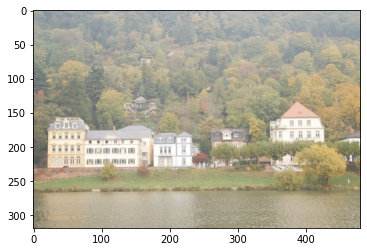

In [13]:
plt.imshow(foggy)
plt.show()

In [61]:
def defog(img):
    lambda_ = -1
    sigma = 10
    h,w,_ = img.shape
    A = np.zeros(img.shape)
    
    x0 = h/2
    y0 = w/2
    
    for x in range(h):
        for y in range(w):
            A[x,y,0] = (1 + lambda_*np.exp(-1*((abs(x-x0)**2+(abs(y-y0))**2))/(2*sigma**2)))*img[x,y,0]
            A[x,y,1] = (1 + lambda_*np.exp(-1*((abs(x-x0)**2+(abs(y-y0))**2))/(2*sigma**2)))*img[x,y,1]
            A[x,y,2] = (1 + lambda_*np.exp(-1*((abs(x-x0)**2+(abs(y-y0))**2))/(2*sigma**2)))*img[x,y,2]
            if A[x,y,0]>255:
                A[x,y,0] = 255
            if A[x,y,1]>255:
                A[x,y,1] = 255
            if A[x,y,2]>255:
                A[x,y,2] = 255

    return np.int64(A)



In [62]:
temp =foggy[:100,:100,:]
defogged_img = defog(temp)

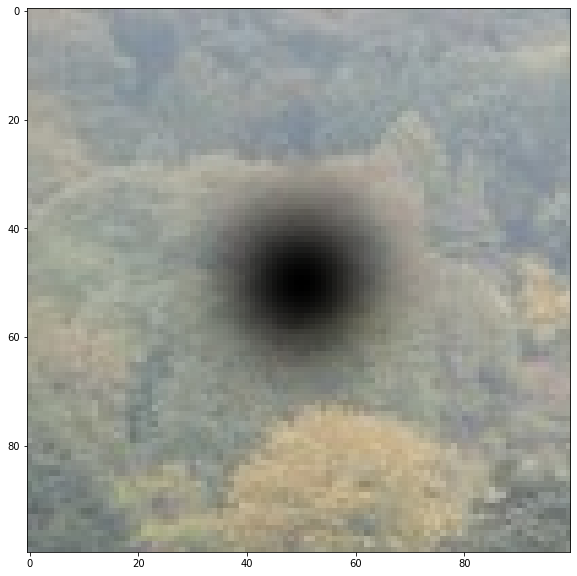

In [63]:
plt.figure(figsize=(12,10))
plt.imshow(defogged_img)
plt.show()